# PMOS Transistor $g_m/I_D$ Design Methodology 
This notebook aims to design a single PMOS transistor with an overdrive voltage ($V_{ov}$) of $200mV$ for a drain current $I_{D}$ of $100\mu A$ for the gf180mcuD technology node.

In [2]:
from pygmid import Lookup as lk
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

In [4]:
# Read data for GF180MCUD NMOS device
pmos = lk('../simulation/pfet_03v3.mat')

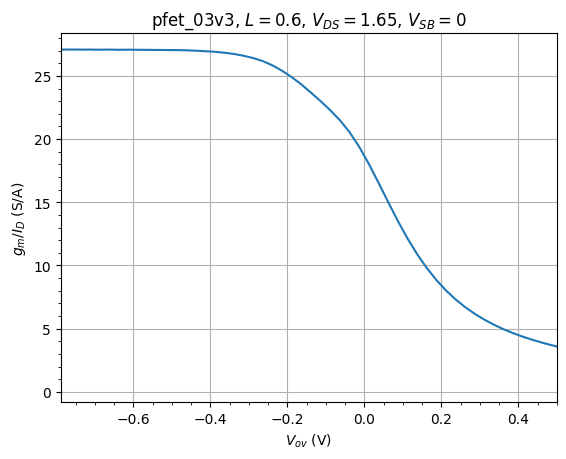

In [6]:
# Make a plot of gm/ID against Vov
# Length chosen to be about twice the minimum length for the technology (approximately 0.6µm)
# For an overdrive voltage (Vov = 200mV), gm/ID should be around 8
L = 0.6
VDS = 1.65
VSB = 0

gm_ID = pmos.lookup("GM_ID", L=L, VDS=VDS, VSB=VSB)
Vt = pmos.lookup("VT", L=L, VDS=VDS, VSB=0)
VGS = pmos['VGS']
Vov = VGS - Vt

plt.plot(Vov, gm_ID)
plt.xlabel(r"$V_{ov}$ (V)")
plt.ylabel(r"$g_m/I_D$ (S/A)")
plt.title('pfet_03v3'+', $L=$'+str(L)+', $V_{DS}=$'+str(VDS)+', $V_{SB}=$'+str(VSB))
plt.xlim(min(Vov), 0.5)
plt.grid()
plt.minorticks_on()
plt.show()

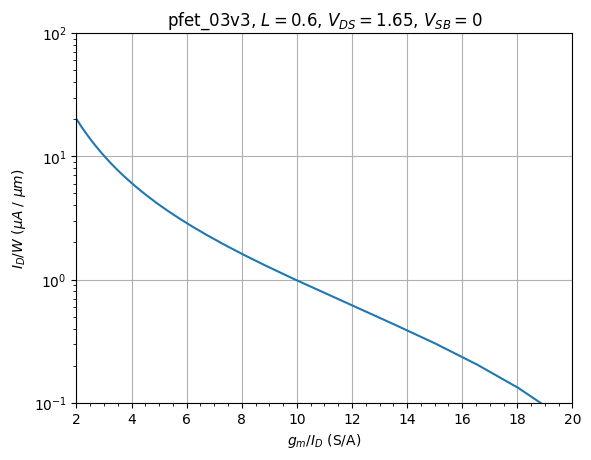

In [7]:
# Make a plot of ID/W against gm/ID
L = 0.6
VDS = 1.65
VSB = 0

gm_ID = pmos.lookup("GM_ID", L=L, VDS=VDS, VSB=VSB)
ID_W = pmos.lookup("ID_W", L=L, VDS=VDS, VSB=VSB)/1e-6

plt.semilogy(gm_ID, ID_W)
plt.ylabel(r"$I_D/W$ ($\mu A$ / $\mu m$)")
plt.xlabel(r"$g_m/I_D$ (S/A)")
plt.title('pfet_03v3'+', $L=$'+str(L)+', $V_{DS}=$'+str(VDS)+', $V_{SB}=$'+str(VSB))
plt.xlim(2, 20)
plt.ylim(0.1, 100)
plt.grid()
plt.minorticks_on()
plt.show()

In [14]:
L = 0.6
VDS = 1.65
VSB = 0
gm_ID = 8
ID = 100

print("With a gm/ID="+str(gm_ID)+", L="+str(L)+", ID="+str(ID)+"µA:")

VGS = pmos.look_upVGS(GM_ID=gm_ID, VDS=VDS, VSB=VSB, L=L)
VT = pmos.lookup("VT", VGS=VGS, VDS=VDS, VSB=VSB, L=L)
print(f"\tVov="+str(VGS-VT)+"V")
print(f"\tVGS="+str(VGS)+"V")

JD = pmos.lookup("ID_W", GM_ID=gm_ID, L=L)/1e-6
W = ID/JD
print(f"\tW="+str(W)+"µm")

With a gm/ID=8, L=0.6, ID=100µA:
	Vov=0.21268214205639224V
	VGS=1.0011821420563922V
	W=61.835961512219654µm
